In [43]:
import keras
import os
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
#from os import walk
#from array import *
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from PIL import Image, ImageOps
import pickle

In [44]:
descriptors_val = pickle.load(open("descriptor_queries_VGG.p", "rb"))

In [45]:
descriptors_train = pickle.load(open("descriptor_database_VGG.p", "rb"))

In [46]:
queries_name = pickle.load(open("desc_queries_name_VGG.p", "rb"))
database_name = pickle.load(open("desc_database_name_VGG.p", "rb"))

In [47]:
print("x_val shape:", descriptors_val.shape) 
print("x_train shape:", descriptors_train.shape)

x_val shape: (2065, 1, 4096)
x_train shape: (2061, 1, 4096)


In [48]:
x_val = np.reshape(descriptors_val, (2065,4096))
x_train = np.reshape(descriptors_train, (2061,4096))

In [49]:
x_val = sklearn.preprocessing.normalize(x_val, norm='l2', axis=1, copy=True, return_norm=False)
x_train = sklearn.preprocessing.normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)

In [50]:
descriptors_traint = x_train.transpose()

In [51]:
similarities=np.matmul(x_val,descriptors_traint)

In [52]:
ranks = np.argsort(similarities, axis=1)[:,::-1]

In [53]:
imagen = pickle.load(open("imagen_kaggle_VGG.p", "rb"))
imagen2 = pickle.load(open("imagen2_kaggle_VGG.p", "rb"))

In [54]:
# get the original images for visualization
x_val_images = []
x_train_images = []

In [55]:
v = 0
for v in range(2065): 
    x_val_images.append(np.array(imagen[v]))

In [56]:
b = 0
for b in range(2061): 
    x_train_images.append(np.array(imagen2[b]))

In [57]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*15,w*10))

In [58]:
# Visualize ranks of the 10 queries
offset = 40 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste(Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
      ima_q = Image.fromarray(x_val_images[q*(offset+1)])
      ima_q = ImageOps.expand(ima_q, border=20, fill='red')

      new_image.paste(ima_q, (0,w*q))

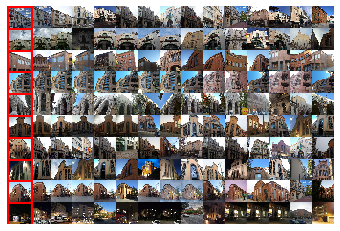

In [59]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [60]:
new_image.save('X:/kaggle/result_kaggle_VGG.png')

In [61]:
csv1 = []
row1 = ["Query","RetrievedDocuments"]

In [62]:
for q in range(2065):
    ranks_q = ranks[q,:]
    csv2 = []
    csv2.append(queries_name[q])
    for i in range(2061):
        if i == 0:
            name = database_name[ranks_q[i]]
        if i == 2061:
            name = name +'\n'
        else:
            name = name + ' ' + database_name[ranks_q[i]]
    csv2.append(name)
    csv1.append(csv2)
    

In [63]:
import csv

with open("kaggle_equip1_rank.csv","w") as myfile:
    wr = csv.writer (myfile, quoting =csv.QUOTE_ALL)
    wr.writerow(row1)
    for z in range(2065):
        wr.writerow(csv1[z])
        